## Code for training classifier methods

In [132]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



print(os.listdir('../Assignment 1'))

['.git', 'opel_corsa_01.csv', 'opel_corsa_02.csv', 'peugeot_207_01.csv', 'peugeot_207_02.csv', 'project.ipynb', 'test.py']


In [134]:


def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Corrected integer division
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [135]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [136]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [137]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# opel_corsa_01.csv has 7392 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../Assignment 1/opel_corsa_01.csv', delimiter=';', nrows = nRowsRead)
df1.dataframeName = 'opel_corsa_01.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1 = df1.drop(['Unnamed: 0'], axis=1) # Drop index column
encoder = LabelEncoder()
df1['roadSurface'] = encoder.fit_transform(df1['roadSurface'])
df1['traffic'] = encoder.fit_transform(df1['traffic'])
df1['drivingStyle'] = encoder.fit_transform(df1['drivingStyle'])


X = df1.drop('drivingStyle', axis=1)
y = df1['drivingStyle']
df1.head(5)


There are 1000 rows and 18 columns


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,0,0,1
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,0,0,1
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,0,0,1
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,0,0,1
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,0,0,1


## SVM With SMOTE

****

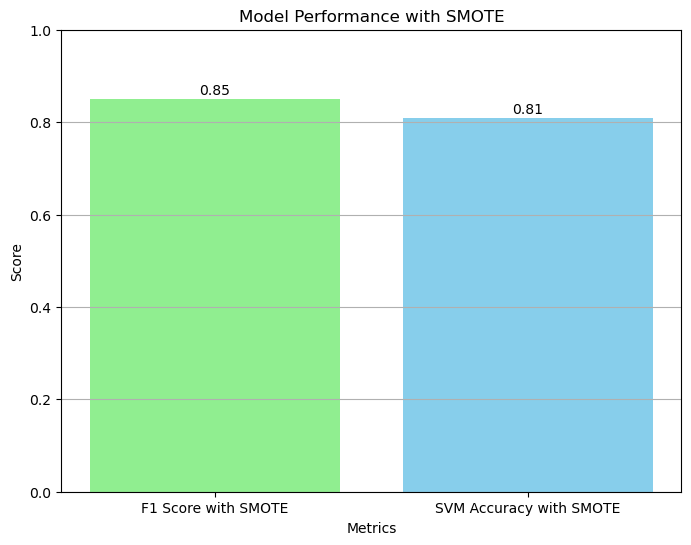

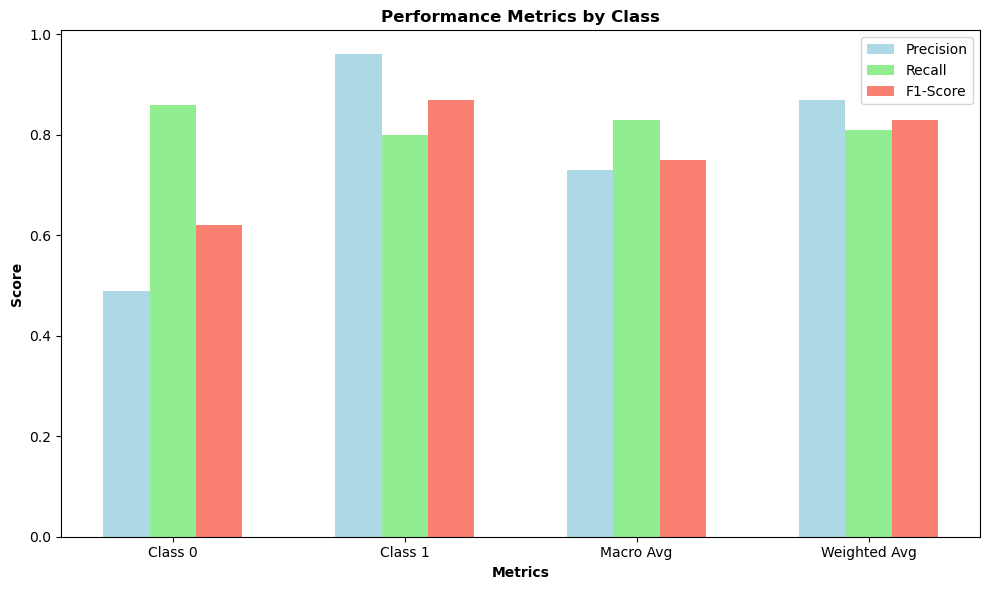

In [258]:
# Values taken from training model in 'test.py' 
# Used only for visualisation
# For an unknown reason SMOTE only works in 'test.py'

import numpy as np
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['F1 Score with SMOTE', 'SVM Accuracy with SMOTE']
values = [0.85, 0.8096590909090909]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['lightgreen', 'skyblue'])
plt.title('Model Performance with SMOTE')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scaling
plt.grid(axis='y')

# Add the values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center')

# Show the plot
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Define the classes and their corresponding metrics
classes = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
precision = [0.49, 0.96, 0.73, 0.87]
recall = [0.86, 0.80, 0.83, 0.81]
f1_score = [0.62, 0.87, 0.75, 0.83]

# Set the x-axis positions of the bars
x_pos = np.arange(len(classes))

# Set the width of the bars
bar_width = 0.2

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_pos - bar_width, precision, width=bar_width, color='lightblue', label='Precision')
plt.bar(x_pos, recall, width=bar_width, color='lightgreen', label='Recall')
plt.bar(x_pos + bar_width, f1_score, width=bar_width, color='salmon', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('Metrics', fontweight='bold')
plt.xticks(x_pos, classes)
plt.ylabel('Score', fontweight='bold')
plt.title('Performance Metrics by Class', fontweight='bold')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



## SVM Without SMOTE

****

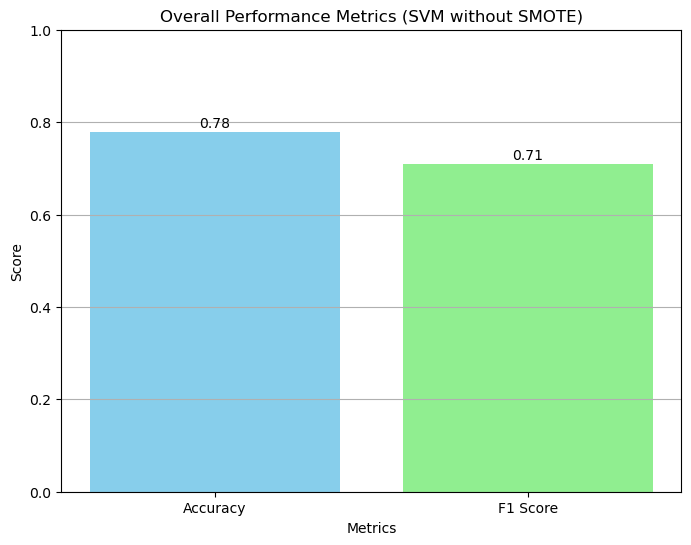

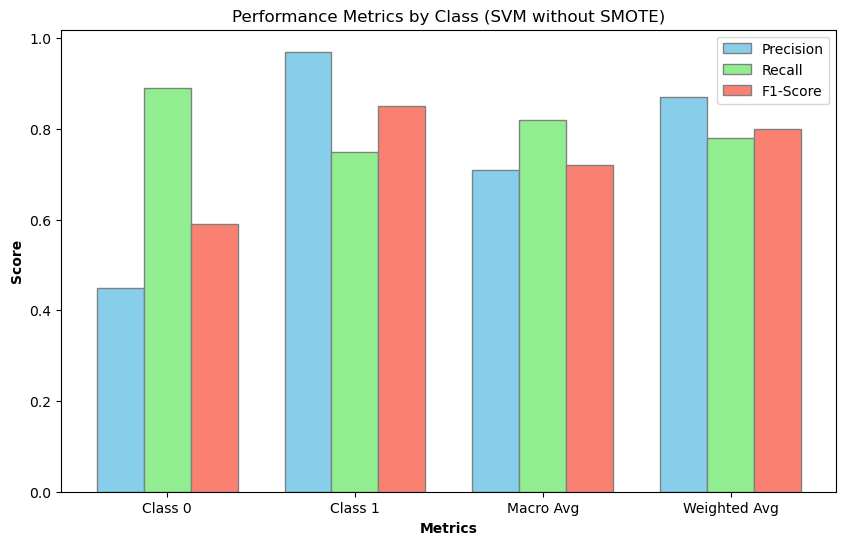

In [259]:
# Values taken from training model in 'test.py' 
# Used only for visualisation

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'F1 Score']
values = [0.7778409090909091, 0.71]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.title('Overall Performance Metrics (SVM without SMOTE)')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scaling
plt.grid(axis='y')

# Add the values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center')

# Show the plot
plt.show()

# Define the classes and their corresponding metrics
classes = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
precision = [0.45, 0.97, 0.71, 0.87]
recall = [0.89, 0.75, 0.82, 0.78]
f1_score = [0.59, 0.85, 0.72, 0.80]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='lightgreen', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='salmon', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classes))], classes)
plt.ylabel('Score', fontweight='bold')
plt.title('Performance Metrics by Class (SVM without SMOTE)')
plt.legend()

# Show plot
plt.show()


## SVM Kernels

****

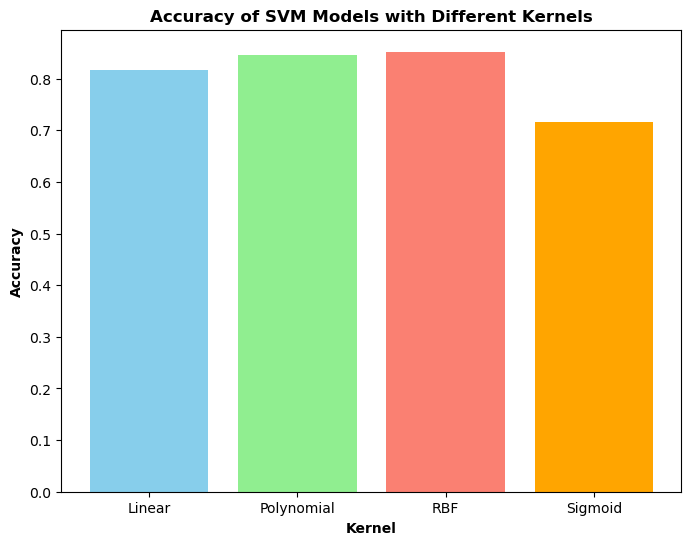

In [265]:
import matplotlib.pyplot as plt

# Define the kernels and their corresponding accuracy scores
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
accuracy_scores = [0.817, 0.845, 0.852, 0.715]  # Replace with actual accuracy scores

# Create the vertical bar chart
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracy_scores, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

# Add labels and title
plt.xlabel('Kernel', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy of SVM Models with Different Kernels', fontweight='bold')

# Show the plot
plt.show()


## Logisitic Regression

***

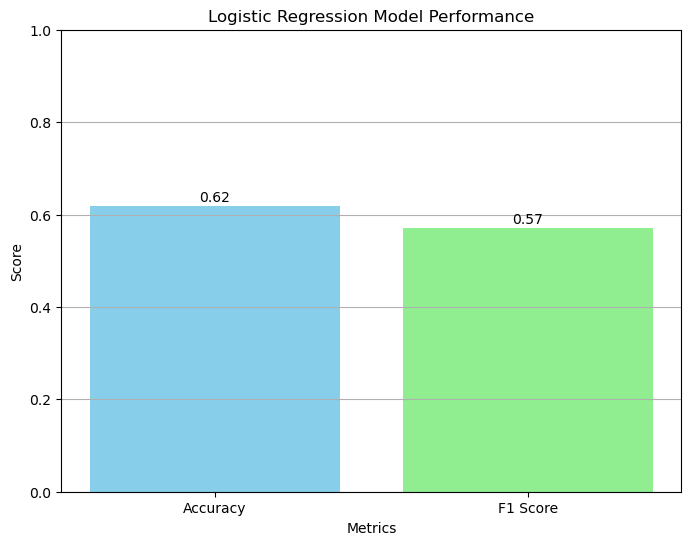

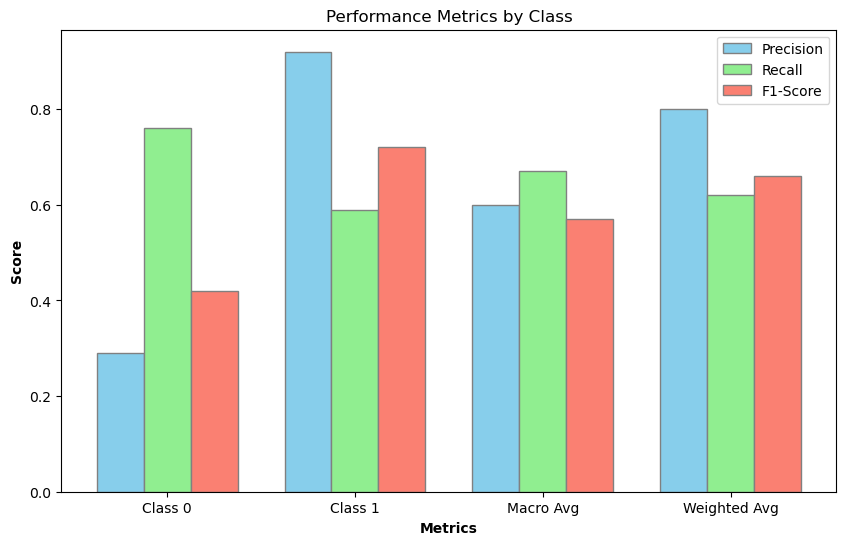

In [266]:
# Values taken from training model in 'test.py' 
# Used only for visualisation

import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'F1 Score']
values = [0.6193181818181818, 0.57]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.title('Logistic Regression Model Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scaling
plt.grid(axis='y')

# Add the values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center')

# Show the plot
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Define the classes and their corresponding metrics
classes = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
precision = [0.29, 0.92, 0.60, 0.80]
recall = [0.76, 0.59, 0.67, 0.62]
f1_score = [0.42, 0.72, 0.57, 0.66]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='lightgreen', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='salmon', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classes))], classes)
plt.ylabel('Score', fontweight='bold')
plt.title('Performance Metrics by Class')
plt.legend()

# Show plot
plt.show()


## kNN

***

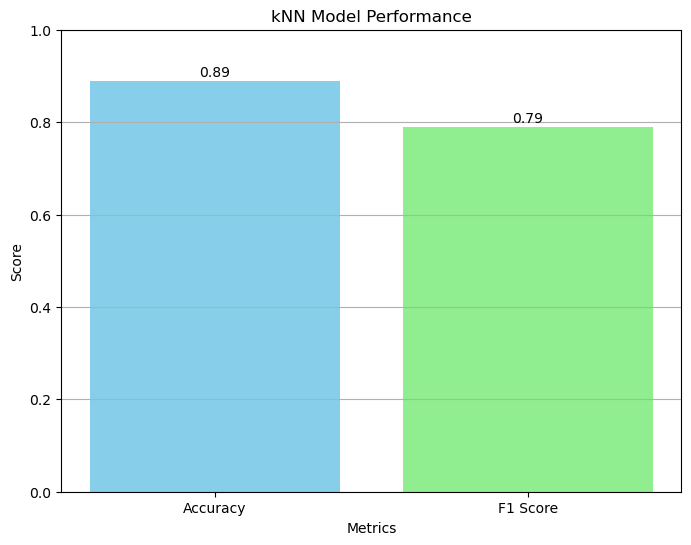

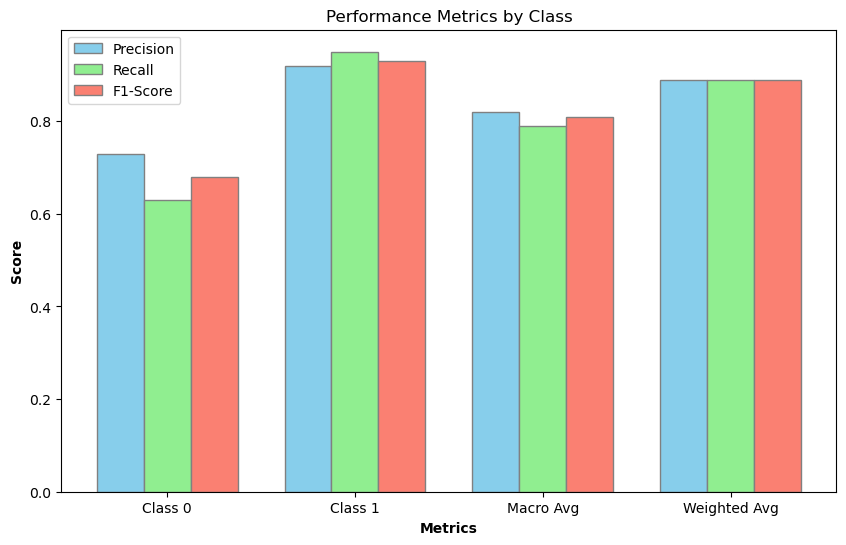

In [267]:
# Values taken from training model in 'test.py' 
# Used only for visualisation

import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'F1 Score']
values = [0.8897727272727273, 0.79]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.title('kNN Model Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scaling
plt.grid(axis='y')

# Add the values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center')

# Show the plot
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Define the classes and their corresponding metrics
classes = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
precision = [0.73, 0.92, 0.82, 0.89]
recall = [0.63, 0.95, 0.79, 0.89]
f1_score = [0.68, 0.93, 0.81, 0.89]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='lightgreen', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='salmon', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classes))], classes)
plt.ylabel('Score', fontweight='bold')
plt.title('Performance Metrics by Class')
plt.legend()

# Show plot
plt.show()

